$\textbf{Empirical Exercise-Week 8}$  Exchange rate dynamics: Comparing Euro and Sterling. File: sterling.csv. Text: p. 610, 13.12


ans =

  1x3 cell array

    {'dateid01'}    {'euro'}    {'sterling'}




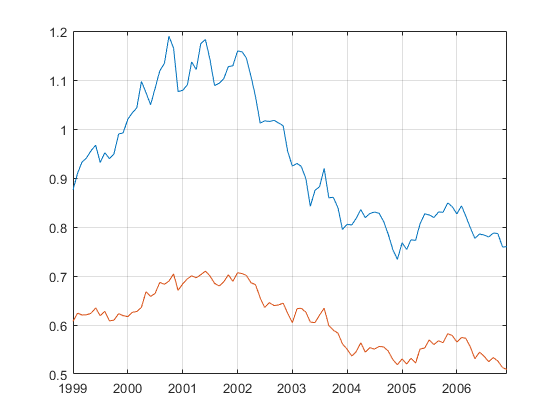

In [1]:
clear all;
warning off;
Tab1 = readtable('sterling.csv');
Tab1.Properties.VariableNames
date2 = table2array(Tab1(:,1)); 
euro = table2array(Tab1(:,2)); 
sterling = table2array(Tab1(:,3));  date1 = datetime(date2);
plot(date1,[euro sterling]); grid;



BINT =

    0.6382    0.6445
    0.3880    0.4275


h =

     0


pval =

    0.1917




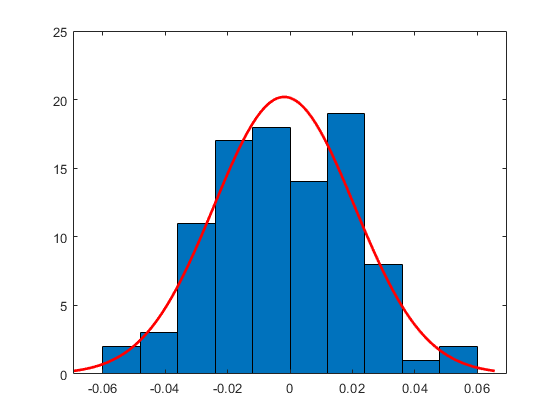

In [3]:
leuro = log(euro);  lsterling = log(sterling);
x = leuro; y = sterling;
xx = [ ones(length(y),1) leuro];
[B BINT R RINT STATS] = regress(y,xx);
BINT
deuro = diff(leuro);
histfit(deuro);
dsterling = diff(lsterling);
histfit(dsterling)
[h pval] = jbtest(deuro)

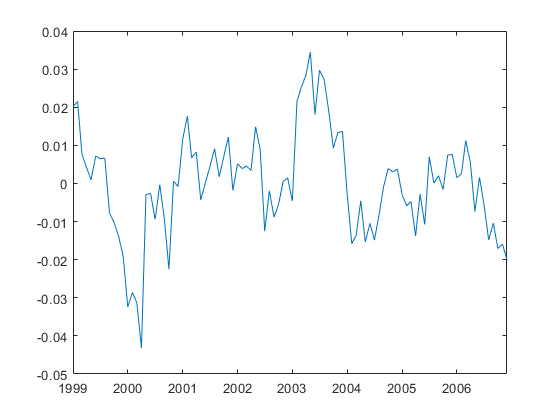

In [4]:
cvec = R;
plot(date1, cvec);  % plot coitegrating vector

In [32]:
yy = [leuro lsterling];
Mdl = vecm(2,1,4);
[EstMdl, EstST, logL,E]= estimate(Mdl,yy);
EstMdl
EstMdl.Cointegration
EstMdl.ShortRun{1:4}







EstMdl = 

  vecm with properties:

             Description: "2-Dimensional Rank = 1 VEC(4) Model"
             SeriesNames: "Y1"  "Y2" 
               NumSeries: 2
                    Rank: 1
                       P: 5
                Constant: [-0.13446 -0.173923]'
              Adjustment: [2×1 matrix]
           Cointegration: [2×1 matrix]
                  Impact: [2×2 matrix]
   CointegrationConstant: 26.1987
      CointegrationTrend: 0
                ShortRun: {2×2 matrices} at lags [1 2 3 ... and 1 more]
                   Trend: [2×1 vector of zeros]
                    Beta: [2×0 matrix]
              Covariance: [2×2 matrix]

ans =

  -39.9725
   57.8824


ans =

    0.1903   -0.3347
    0.2692   -0.3455


ans =

    0.0366    0.0433
   -0.0304    0.0844


ans =

   -0.2869    0.3199
   -0.2983    0.3435


ans =

   -0.3323    0.3629
   -0.1265    0.2730




In [43]:

Mdl1 = varm(2,4);
[EstMdl1] = estimate(Mdl1,yy);
[h, Summary] = gctest(EstMdl1);


                    H0                         Decision         Distribution    Statistic      PValue      CriticalValue
    __________________________________    __________________    ____________    _________    __________    _____________

    "Exclude lagged Y2 in Y1 equation"    "Cannot reject H0"     "Chi2(4)"       7.9821        0.092236       9.4877    
    "Exclude lagged Y1 in Y2 equation"    "Reject H0"            "Chi2(4)"       29.984      4.9312e-06       9.4877    




First coefficient is the constant, then lags, last term is error-correction term. You can see that the error-correction coefficient is significant.

We see that the euro "Granger causes" sterling but sterling does not cause Euro in the Granger sense.
Now let us to this without Error correction, just the first differences.